In [1]:
from helpers.what_if_helpers import run_base_and_intervention, baseline_pars
import covasim as cv
cv.options.set(dpi=100, show=False, close=True, verbose=0)  # Standard options for Jupyter notebook

Covasim 3.0.7 (2021-06-29) — © 2021 by IDM


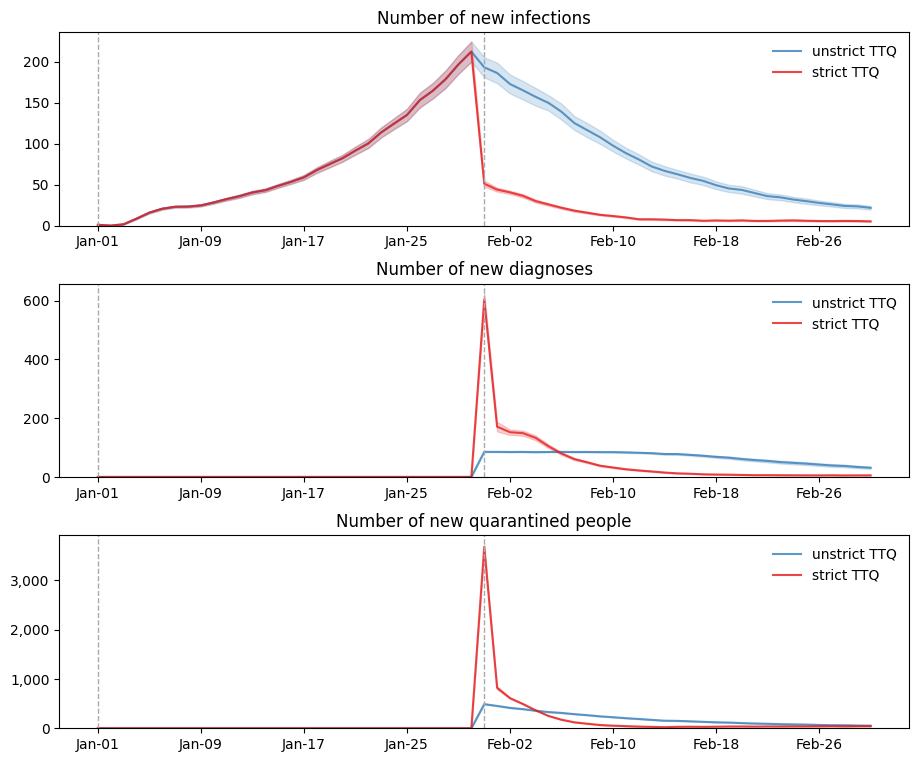

In [2]:
tn_low = cv.test_num(daily_tests=100, start_day=30)
ct_low = cv.contact_tracing(trace_probs=dict(h=0.5, s=0.25, w=0.25, c=0.15))
tn_high = cv.test_num(daily_tests=1000, start_day=30) # 10 times more tests
ct_high = cv.contact_tracing(trace_probs=dict(h=1.0, s=0.5, w=0.5, c=0.3)) # double probabilities

unstrict_sim = cv.Sim(baseline_pars, interventions=[tn_low, ct_low], label='unstrict TTQ')
strict_sim = cv.Sim(baseline_pars, interventions=[tn_high, ct_high], label='strict TTQ')
multi_sim = run_base_and_intervention(unstrict_sim, strict_sim)
multi_sim.plot(to_plot=['new_infections', 'new_diagnoses', 'new_quarantined'])